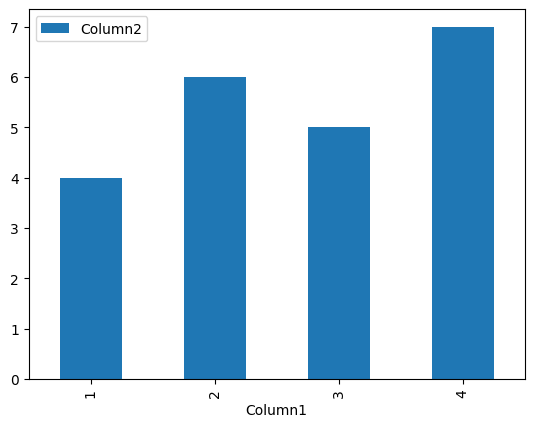

In [21]:
import os
import docx
from docx.shared import Cm
from docxtpl import DocxTemplate, InlineImage
import pandas as pd
import matplotlib.pyplot as plt

# Load data
os.chdir('C:\\Users\\jerem\\Desktop\\Data Analytics\\Visual Studio Code\\docxtpl')
Template_File = DocxTemplate('Word_Template.docx')

data = {'Column1': [1, 2, 3, 4],
        'Column2': [4, 6, 5, 7]}

data = pd.DataFrame(data)
data.plot(x = "Column1", y = "Column2", kind = "bar")

plt.savefig('chart.jpg')

df = data.copy()
df = df.rename(columns = {'Column1': 'Col1',
                          'Column2': 'Col2'})
df = df.to_dict(orient = 'records')

# Import saved figure
image = InlineImage(Template_File,'chart.jpg', Cm(10))

content = {'var_1': 'Chair',
           'var_2': 'Hard and sturdy',
           'var_3': '17 April 2023',
           'var_4': '$20.95',
           'var_5': '100',
           'Chart1': image,
           'dataframe': df}

Template_File.render(content)
Template_File.save('Populated_Template.docx')